<a href="https://colab.research.google.com/github/RonakRaj-dev/Quidditch-Player-Health-Monitoring/blob/main/IIIT_BBSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# First Try

In [ ]:
# # Set random seed for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# class QuidditchDeepHealthRiskPredictor:
#     def __init__(self):
#         # Define potential health risks for each position
#         self.position_health_risks = {
#             'Chaser': {
#                 'potential_risks': [
#                     'respiratory_issues',
#                     'shoulder_strain',
#                     'upper_body_fatigue',
#                     'cardiovascular_stress'
#                 ],
#                 'risk_factors': [
#                     'constant_throwing',
#                     'high_speed_maneuvers',
#                     'frequent_direction_changes'
#                 ]
#             },
#             'Keeper': {
#                 'potential_risks': [
#                     'shoulder_injuries',
#                     'lower_back_pain',
#                     'reaction_time_stress',
#                     'sudden_movement_risks'
#                 ],
#                 'risk_factors': [
#                     'rapid_lateral_movements',
#                     'prolonged_defensive_postures',
#                     'high_intensity_short_bursts'
#                 ]
#             },
#             'Beater': {
#                 'potential_risks': [
#                     'arm_and_shoulder_strain',
#                     'rotator_cuff_injuries',
#                     'repetitive_motion_disorders',
#                     'hand_and_wrist_trauma'
#                 ],
#                 'risk_factors': [
#                     'repeated_bat_swinging',
#                     'precise_bludger_redirections',
#                     'sudden_impact_movements'
#                 ]
#             },
#             'Seeker': {
#                 'potential_risks': [
#                     'neck_strain',
#                     'eye_strain',
#                     'rapid_acceleration_stress',
#                     'sudden_stop_injuries'
#                 ],
#                 'risk_factors': [
#                     'constant_scanning',
#                     'unpredictable_snitch_pursuit',
#                     'extreme_acceleration_deceleration'
#                 ]
#             }
#         }

#         # Initialize the model
#         self.model = None
#         self.feature_names = None

#     def generate_match_time_series_data(self, num_players=100, matches_per_player=10, time_steps=50):
#         """
#         Generate synthetic time series data representing player movements and actions during matches
#         """
#         # All Quidditch positions
#         positions = list(self.position_health_risks.keys())

#         player_data = []
#         match_series_data = []
#         health_outcomes = []

#         for player_id in range(num_players):
#             # Assign player attributes
#             position = np.random.choice(positions)
#             age = np.random.normal(25, 5)
#             years_playing = np.random.normal(5, 3)

#             # Generate baseline risk factors based on position
#             position_risk_factors = {}
#             for risk_factor in self.position_health_risks[position]['risk_factors']:
#                 position_risk_factors[risk_factor] = np.random.uniform(2, 8)

#             # Determine baseline health risk for this player
#             baseline_risk_score = sum(position_risk_factors.values()) / len(position_risk_factors)

#             # Generate match data for each player
#             for match_id in range(matches_per_player):
#                 # Generate time series data for this match
#                 match_intensity = np.random.uniform(0.7, 1.3)  # Random match intensity multiplier

#                 # Initialize time series arrays for this match
#                 speed = []
#                 altitude = []
#                 acceleration = []
#                 rotation = []
#                 heart_rate = []

#                 # Base values influenced by position
#                 base_speed = 40 if position == 'Seeker' else 30
#                 base_altitude = 50
#                 base_heart_rate = 120

#                 # Generate time series data
#                 for t in range(time_steps):
#                     # Add randomness and trends
#                     speed_val = base_speed * match_intensity * (1 + 0.3 * np.sin(t/10) + np.random.normal(0, 0.1))
#                     altitude_val = base_altitude * (1 + 0.2 * np.cos(t/15) + np.random.normal(0, 0.05))
#                     accel_val = np.diff([speed_val, speed_val * (1 + np.random.normal(0, 0.1))])[0]
#                     rotation_val = 360 * np.random.beta(2, 2) if np.random.random() < 0.2 else 20 * np.random.normal(0, 1)
#                     heart_rate_val = base_heart_rate + 60 * (speed_val / base_speed) + np.random.normal(0, 5)

#                     # Position-specific adjustments
#                     if position == 'Chaser':
#                         speed_val *= 1.1 if t % 10 < 5 else 0.9  # Burst of speed followed by recovery
#                     elif position == 'Keeper':
#                         speed_val *= 0.7  # Less movement but more intense bursts
#                         speed_val *= 3 if np.random.random() < 0.1 else 1  # Occasional defensive bursts
#                     elif position == 'Beater':
#                         rotation_val *= 1.5  # More rotation for bat swinging
#                     elif position == 'Seeker':
#                         if t > time_steps * 0.8 and np.random.random() < 0.3:  # Snitch chase near end
#                             speed_val *= 1.5
#                             accel_val *= 2
#                             heart_rate_val += 20

#                     speed.append(speed_val)
#                     altitude.append(altitude_val)
#                     acceleration.append(accel_val)
#                     rotation.append(rotation_val)
#                     heart_rate.append(heart_rate_val)

#                 # Calculate match stress indicators
#                 avg_speed = np.mean(speed)
#                 max_accel = np.max(np.abs(acceleration))
#                 avg_heart_rate = np.mean(heart_rate)
#                 altitude_changes = np.sum(np.abs(np.diff(altitude)))
#                 rotation_stress = np.sum(np.abs(rotation))

#                 # Store time series data
#                 match_series = np.column_stack([speed, altitude, acceleration, rotation, heart_rate])
#                 match_series_data.append({
#                     'player_id': player_id,
#                     'match_id': match_id,
#                     'position': position,
#                     'time_series': match_series
#                 })

#                 # Store player data
#                 player_data.append({
#                     'player_id': player_id,
#                     'match_id': match_id,
#                     'position': position,
#                     'age': age,
#                     'years_playing': years_playing,
#                     'avg_speed': avg_speed,
#                     'max_acceleration': max_accel,
#                     'avg_heart_rate': avg_heart_rate,
#                     'altitude_changes': altitude_changes,
#                     'rotation_stress': rotation_stress,
#                     'match_intensity': match_intensity
#                 })

#                 # Calculate health risk for this match
#                 position_risk = baseline_risk_score
#                 # Adjust risk based on match data
#                 position_risk += 0.1 * max_accel / 10
#                 position_risk += 0.1 * avg_heart_rate / 160
#                 position_risk += 0.1 * rotation_stress / 1000
#                 position_risk += 0.05 * match_intensity

#                 # Add some randomness
#                 position_risk += np.random.normal(0, 0.2)

#                 # Determine health outcome (simplified binary classification)
#                 health_issue = 1 if position_risk > 7 else 0

#                 health_outcomes.append({
#                     'player_id': player_id,
#                     'match_id': match_id,
#                     'position': position,
#                     'health_issue': health_issue,
#                     'risk_score': position_risk
#                 })

#         # Convert to dataframes
#         player_df = pd.DataFrame(player_data)
#         health_df = pd.DataFrame(health_outcomes)

#         return player_df, match_series_data, health_df

#     def prepare_lstm_data(self, player_df, match_series_data, health_df):
#         """
#         Prepare data for LSTM model - combines player attributes with time series match data
#         """
#         # Create feature arrays for LSTM
#         X_seq = []
#         player_positions = []
#         y = []
#         player_ids = []

#         for match in match_series_data:
#             player_id = match['player_id']
#             match_id = match['match_id']
#             position = match['position']

#             # Get corresponding health outcome
#             health_row = health_df[(health_df['player_id'] == player_id) &
#                                   (health_df['match_id'] == match_id)]

#             if not health_row.empty:
#                 X_seq.append(match['time_series'])
#                 y.append(health_row['health_issue'].values[0])
#                 player_positions.append(position)
#                 player_ids.append(player_id)

#         # Convert to numpy arrays
#         X_seq = np.array(X_seq)
#         y = np.array(y)

#         # Store feature names for later reference
#         self.feature_names = ['speed', 'altitude', 'acceleration', 'rotation', 'heart_rate']

#         # Split the data
#         X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test = train_test_split(
#             X_seq, y, player_positions, player_ids, test_size=0.2, random_state=42)

#         return X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test

#     def build_lstm_model(self, input_shape):
#         """
#         Build an LSTM model for sequence data
#         """
#         model = Sequential([
#             # LSTM layers
#             LSTM(64, input_shape=input_shape, return_sequences=True),
#             BatchNormalization(),
#             Dropout(0.3),

#             LSTM(32, return_sequences=False),
#             BatchNormalization(),
#             Dropout(0.3),

#             # Dense layers for classification
#             Dense(16, activation='relu'),
#             BatchNormalization(),
#             Dropout(0.2),

#             Dense(1, activation='sigmoid')
#         ])

#         # Compile the model
#         model.compile(
#             optimizer=Adam(learning_rate=0.001),
#             loss='binary_crossentropy',
#             metrics=['accuracy']
#         )

#         return model

#     def train_lstm_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
#         """
#         Train the LSTM model with early stopping
#         """
#         # Early stopping to prevent overfitting
#         early_stopping = EarlyStopping(
#             monitor='val_loss',
#             patience=10,
#             restore_best_weights=True
#         )

#         # Get input shape from training data
#         input_shape = X_train.shape[1:]

#         # Build the model
#         self.model = self.build_lstm_model(input_shape)

#         # Train the model
#         history = self.model.fit(
#             X_train, y_train,
#             validation_data=(X_val, y_val),
#             epochs=epochs,
#             batch_size=batch_size,
#             callbacks=[early_stopping],
#             verbose=1
#         )

#         return history

#     def evaluate_lstm_model(self, X_test, y_test):
#         """
#         Evaluate the LSTM model
#         """
#         # Predict probabilities
#         y_pred_prob = self.model.predict(X_test)
#         # Convert to binary predictions
#         y_pred = (y_pred_prob > 0.5).astype(int).flatten()

#         # Calculate confusion matrix
#         cm = confusion_matrix(y_test, y_pred)

#         # Generate classification report
#         report = classification_report(y_test, y_pred)

#         # Calculate accuracy
#         accuracy = (y_pred == y_test).mean()

#         return {
#             'accuracy': accuracy,
#             'confusion_matrix': cm,
#             'classification_report': report,
#             'predictions': y_pred,
#             'probabilities': y_pred_prob
#         }

#     def predict_health_risk_from_match(self, match_data):
#         """
#         Predict health risk from a single match time series
#         """
#         # Ensure data is in the right shape
#         if len(match_data.shape) == 2:  # Single sequence
#             match_data = np.expand_dims(match_data, axis=0)

#         # Make prediction
#         risk_probability = self.model.predict(match_data)
#         return risk_probability[0][0]

#     def visualize_training_history(self, history):
#         """
#         Visualize the training history
#         """
#         plt.figure(figsize=(12, 4))

#         # Plot training & validation accuracy
#         plt.subplot(1, 2, 1)
#         plt.plot(history.history['accuracy'])
#         plt.plot(history.history['val_accuracy'])
#         plt.title('Model Accuracy')
#         plt.ylabel('Accuracy')
#         plt.xlabel('Epoch')
#         plt.legend(['Train', 'Validation'], loc='lower right')

#         # Plot training & validation loss
#         plt.subplot(1, 2, 2)
#         plt.plot(history.history['loss'])
#         plt.plot(history.history['val_loss'])
#         plt.title('Model Loss')
#         plt.ylabel('Loss')
#         plt.xlabel('Epoch')
#         plt.legend(['Train', 'Validation'], loc='upper right')

#         plt.tight_layout()
#         plt.show()

#     def visualize_confusion_matrix(self, cm):
#         """
#         Visualize confusion matrix
#         """
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                    xticklabels=['No Health Issue', 'Health Issue'],
#                    yticklabels=['No Health Issue', 'Health Issue'])
#         plt.title('Confusion Matrix')
#         plt.ylabel('True Label')
#         plt.xlabel('Predicted Label')
#         plt.tight_layout()
#         plt.show()

#     def visualize_feature_importance(self, X_test, feature_names=None):
#         """
#         Visualize feature importance using permutation importance
#         Simplified for time series data
#         """
#         if feature_names is None:
#             feature_names = self.feature_names

#         # Get baseline accuracy
#         original_preds = self.model.predict(X_test)

#         # Dictionary to store feature importance
#         feature_importance = {}

#         # For each feature, permute its values and see how it affects predictions
#         for i, feature in enumerate(feature_names):
#             # Make a copy of the test data
#             X_permuted = X_test.copy()

#             # Permute this feature across all time steps
#             for j in range(X_permuted.shape[0]):
#                 np.random.shuffle(X_permuted[j, :, i])

#             # Get new predictions
#             new_preds = self.model.predict(X_permuted)

#             # Calculate drop in accuracy (importance)
#             importance = np.mean(np.abs(original_preds - new_preds))
#             feature_importance[feature] = importance

#         # Plot feature importance
#         plt.figure(figsize=(10, 6))
#         features = list(feature_importance.keys())
#         importances = list(feature_importance.values())
#         indices = np.argsort(importances)

#         plt.barh(range(len(indices)), [importances[i] for i in indices])
#         plt.yticks(range(len(indices)), [features[i] for i in indices])
#         plt.title('Feature Importance')
#         plt.xlabel('Mean Absolute Difference in Predictions')
#         plt.tight_layout()
#         plt.show()

#         return feature_importance

#     def visualize_sample_time_series(self, X, positions, health_outcomes, sample_size=5):
#         """
#         Visualize sample time series data for each position
#         """
#         # Number of features
#         n_features = X.shape[2]
#         feature_names = self.feature_names if self.feature_names else [f'Feature {i}' for i in range(n_features)]

#         # Unique positions
#         unique_positions = list(set(positions))

#         # Plot settings
#         n_positions = len(unique_positions)
#         fig, axes = plt.subplots(n_positions, n_features, figsize=(20, 4*n_positions))

#         # For each position
#         for p, position in enumerate(unique_positions):
#             # Find samples for this position
#             position_indices = [i for i, pos in enumerate(positions) if pos == position]

#             # Select samples (both healthy and with issues if possible)
#             healthy_indices = [i for i in position_indices if health_outcomes[i] == 0]
#             issue_indices = [i for i in position_indices if health_outcomes[i] == 1]

#             # Take up to sample_size/2 from each category
#             healthy_sample = healthy_indices[:sample_size//2] if healthy_indices else []
#             issue_sample = issue_indices[:sample_size//2] if issue_indices else []
#             selected_indices = healthy_sample + issue_sample

#             # If not enough samples, add more from either category
#             remaining = sample_size - len(selected_indices)
#             if remaining > 0:
#                 if len(healthy_indices) > len(healthy_sample):
#                     selected_indices += healthy_indices[len(healthy_sample):len(healthy_sample)+remaining]
#                 elif len(issue_indices) > len(issue_sample):
#                     selected_indices += issue_indices[len(issue_sample):len(issue_sample)+remaining]

#             # Plot each feature for this position
#             for f in range(n_features):
#                 ax = axes[p, f] if n_positions > 1 else axes[f]

#                 # Plot data
#                 for idx in selected_indices:
#                     color = 'red' if health_outcomes[idx] == 1 else 'green'
#                     alpha = 0.7
#                     ax.plot(X[idx, :, f], color=color, alpha=alpha)

#                 # Add title and labels
#                 if p == 0:
#                     ax.set_title(feature_names[f])
#                 if f == 0:
#                     ax.set_ylabel(position)

#         plt.tight_layout()
#         plt.show()

# # Main execution for Google Colab
# def run_quidditch_health_risk_model():
#     print("🧙‍♂️ Quidditch Player Health Risk Prediction Model 🧹")
#     print("-" * 50)

#     # Create the predictor
#     predictor = QuidditchDeepHealthRiskPredictor()

#     # Generate synthetic time series data
#     print("Generating synthetic Quidditch match data...")
#     player_df, match_series_data, health_df = predictor.generate_match_time_series_data(
#         num_players=100, matches_per_player=10, time_steps=50)

#     # Display summary of the generated data
#     print(f"Generated data for {len(player_df)} player-matches")
#     position_counts = player_df['position'].value_counts()
#     print("\nPosition distribution:")
#     for position, count in position_counts.items():
#         print(f"  {position}: {count} matches")

#     health_issue_rate = health_df['health_issue'].mean() * 100
#     print(f"\nHealth issue rate: {health_issue_rate:.1f}%")

#     # Prepare data for LSTM
#     print("\nPreparing data for LSTM model...")
#     X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test = (
#         predictor.prepare_lstm_data(player_df, match_series_data, health_df)
#     )

#     print(f"Training data shape: {X_train.shape}")
#     print(f"Test data shape: {X_test.shape}")

#     # Train LSTM model
#     print("\nTraining LSTM model...")
#     history = predictor.train_lstm_model(X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

#     # Visualize training history
#     print("\nTraining history:")
#     predictor.visualize_training_history(history)

#     # Evaluate the model
#     print("\nEvaluating model...")
#     results = predictor.evaluate_lstm_model(X_test, y_test)
#     print(f"Test accuracy: {results['accuracy']:.4f}")
#     print("\nClassification Report:")
#     print(results['classification_report'])

#     # Visualize confusion matrix
#     print("\nConfusion Matrix:")
#     predictor.visualize_confusion_matrix(results['confusion_matrix'])

#     # Visualize feature importance
#     print("\nFeature Importance Analysis:")
#     predictor.visualize_feature_importance(X_test)

#     # Visualize sample time series for each position
#     print("\nSample Time Series Data by Position:")
#     predictor.visualize_sample_time_series(X_test, pos_test, y_test)

#     # Analyze health risk by position
#     print("\nHealth Risk Analysis by Position:")
#     position_risk = {}
#     for position in predictor.position_health_risks.keys():
#         # Filter test set by position
#         position_indices = [i for i, pos in enumerate(pos_test) if pos == position]
#         if position_indices:
#             position_X = X_test[position_indices]
#             position_y = y_test[position_indices]

#             # Get predictions
#             y_pred_prob = predictor.model.predict(position_X).flatten()
#             avg_risk = np.mean(y_pred_prob)
#             position_risk[position] = avg_risk

#     # Plot position risk
#     plt.figure(figsize=(10, 6))
#     positions = list(position_risk.keys())
#     risks = [position_risk[p] for p in positions]
#     colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

#     plt.bar(positions, risks, color=colors)
#     plt.title('Average Health Risk by Quidditch Position')
#     plt.ylabel('Risk Probability')
#     plt.ylim(0, 1)

#     # Add position-specific health issues
#     for i, position in enumerate(positions):
#         risks = predictor.position_health_risks[position]['potential_risks']
#         risk_text = "\n".join(risks)
#         plt.annotate(risk_text,
#                      xy=(i, position_risk[position] + 0.05),
#                      ha='center',
#                      va='bottom',
#                      fontsize=8,
#                      bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

#     plt.tight_layout()
#     plt.show()

#     # Example prediction using a random test sample
#     sample_idx = np.random.choice(len(X_test))
#     sample_match = X_test[sample_idx]
#     sample_position = pos_test[sample_idx]
#     actual_outcome = y_test[sample_idx]

#     risk_prob = predictor.predict_health_risk_from_match(sample_match)

#     print(f"\nSample Prediction Analysis:")
#     print(f"Position: {sample_position}")
#     print(f"Predicted health risk probability: {risk_prob:.4f}")
#     print(f"Actual health issue: {'Yes' if actual_outcome == 1 else 'No'}")
#     print(f"Prediction: {'High risk' if risk_prob > 0.5 else 'Low risk'}")

#     # Show potential health issues for this position
#     print(f"\nPotential health issues for {sample_position}:")
#     for risk in predictor.position_health_risks[sample_position]['potential_risks']:
#         print(f" - {risk}")

#     # Visualize this specific match time series
#     plt.figure(figsize=(15, 10))
#     for i, feature in enumerate(predictor.feature_names):
#         plt.subplot(len(predictor.feature_names), 1, i+1)
#         plt.plot(sample_match[:, i])
#         plt.title(f"{feature} - {sample_position}")
#         plt.tight_layout()
#     plt.show()

#     return predictor

# Second Try

Starting Quidditch Vital Signs Monitoring System...
🧙‍♂️ Quidditch Player Vital Signs Monitor 🧹
--------------------------------------------------
Generating synthetic Quidditch vital signs data...
Generated data for 1000 player-matches

Position distribution:
  Beater: 340 matches
  Seeker: 240 matches
  Chaser: 220 matches
  Keeper: 200 matches

Health issue rate: 24.2%

Preparing data for LSTM model...
Training data shape: (800, 50, 4)
Test data shape: (200, 50, 4)

Training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.5067 - loss: 0.9293 - val_accuracy: 0.2300 - val_loss: 0.7287
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5573 - loss: 0.7731 - val_accuracy: 0.7450 - val_loss: 0.6372
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5682 - loss: 0.7860 - val_accuracy: 0.7700 - val_loss: 0.6426
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6036 - loss: 0.6953 - val_accuracy: 0.7700 - val_loss: 0.6341
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6021 - loss: 0.6778 - val_accuracy: 0.7600 - val_loss: 0.6283
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6441 - loss: 0.6360 - val_accuracy: 0.7550 - val_loss: 0.6035
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6783 - loss: 0.6098 - val_accuracy: 0.7700 - val_loss: 0.5522
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6816 - loss: 0.6157 - val_accuracy: 0.7700 - v

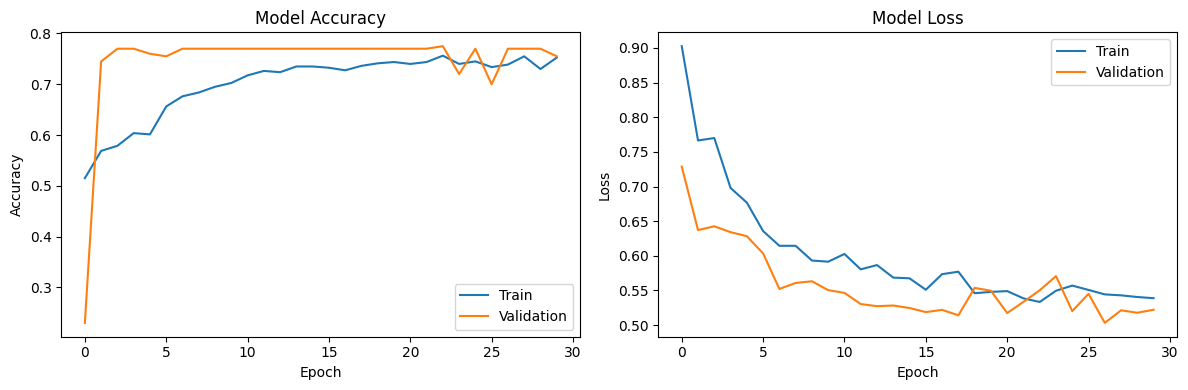


Evaluating model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Test accuracy: 0.7700

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        46

    accuracy                           0.77       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.59      0.77      0.67       200


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


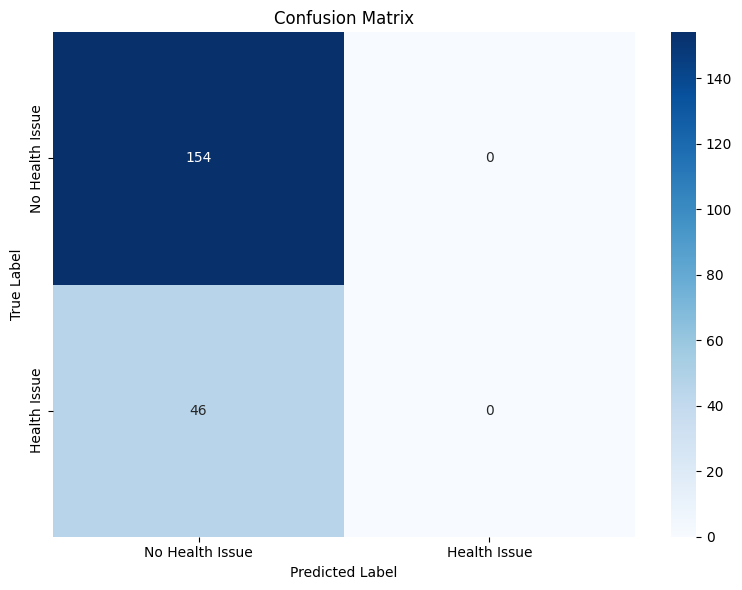


Feature Importance Analysis:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


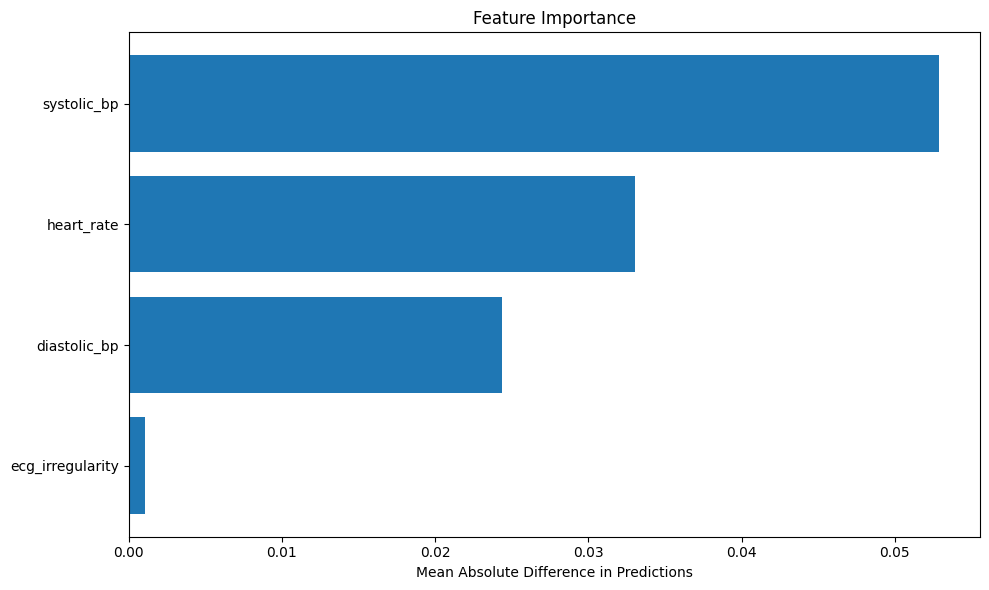


Sample Vital Signs Data by Position:


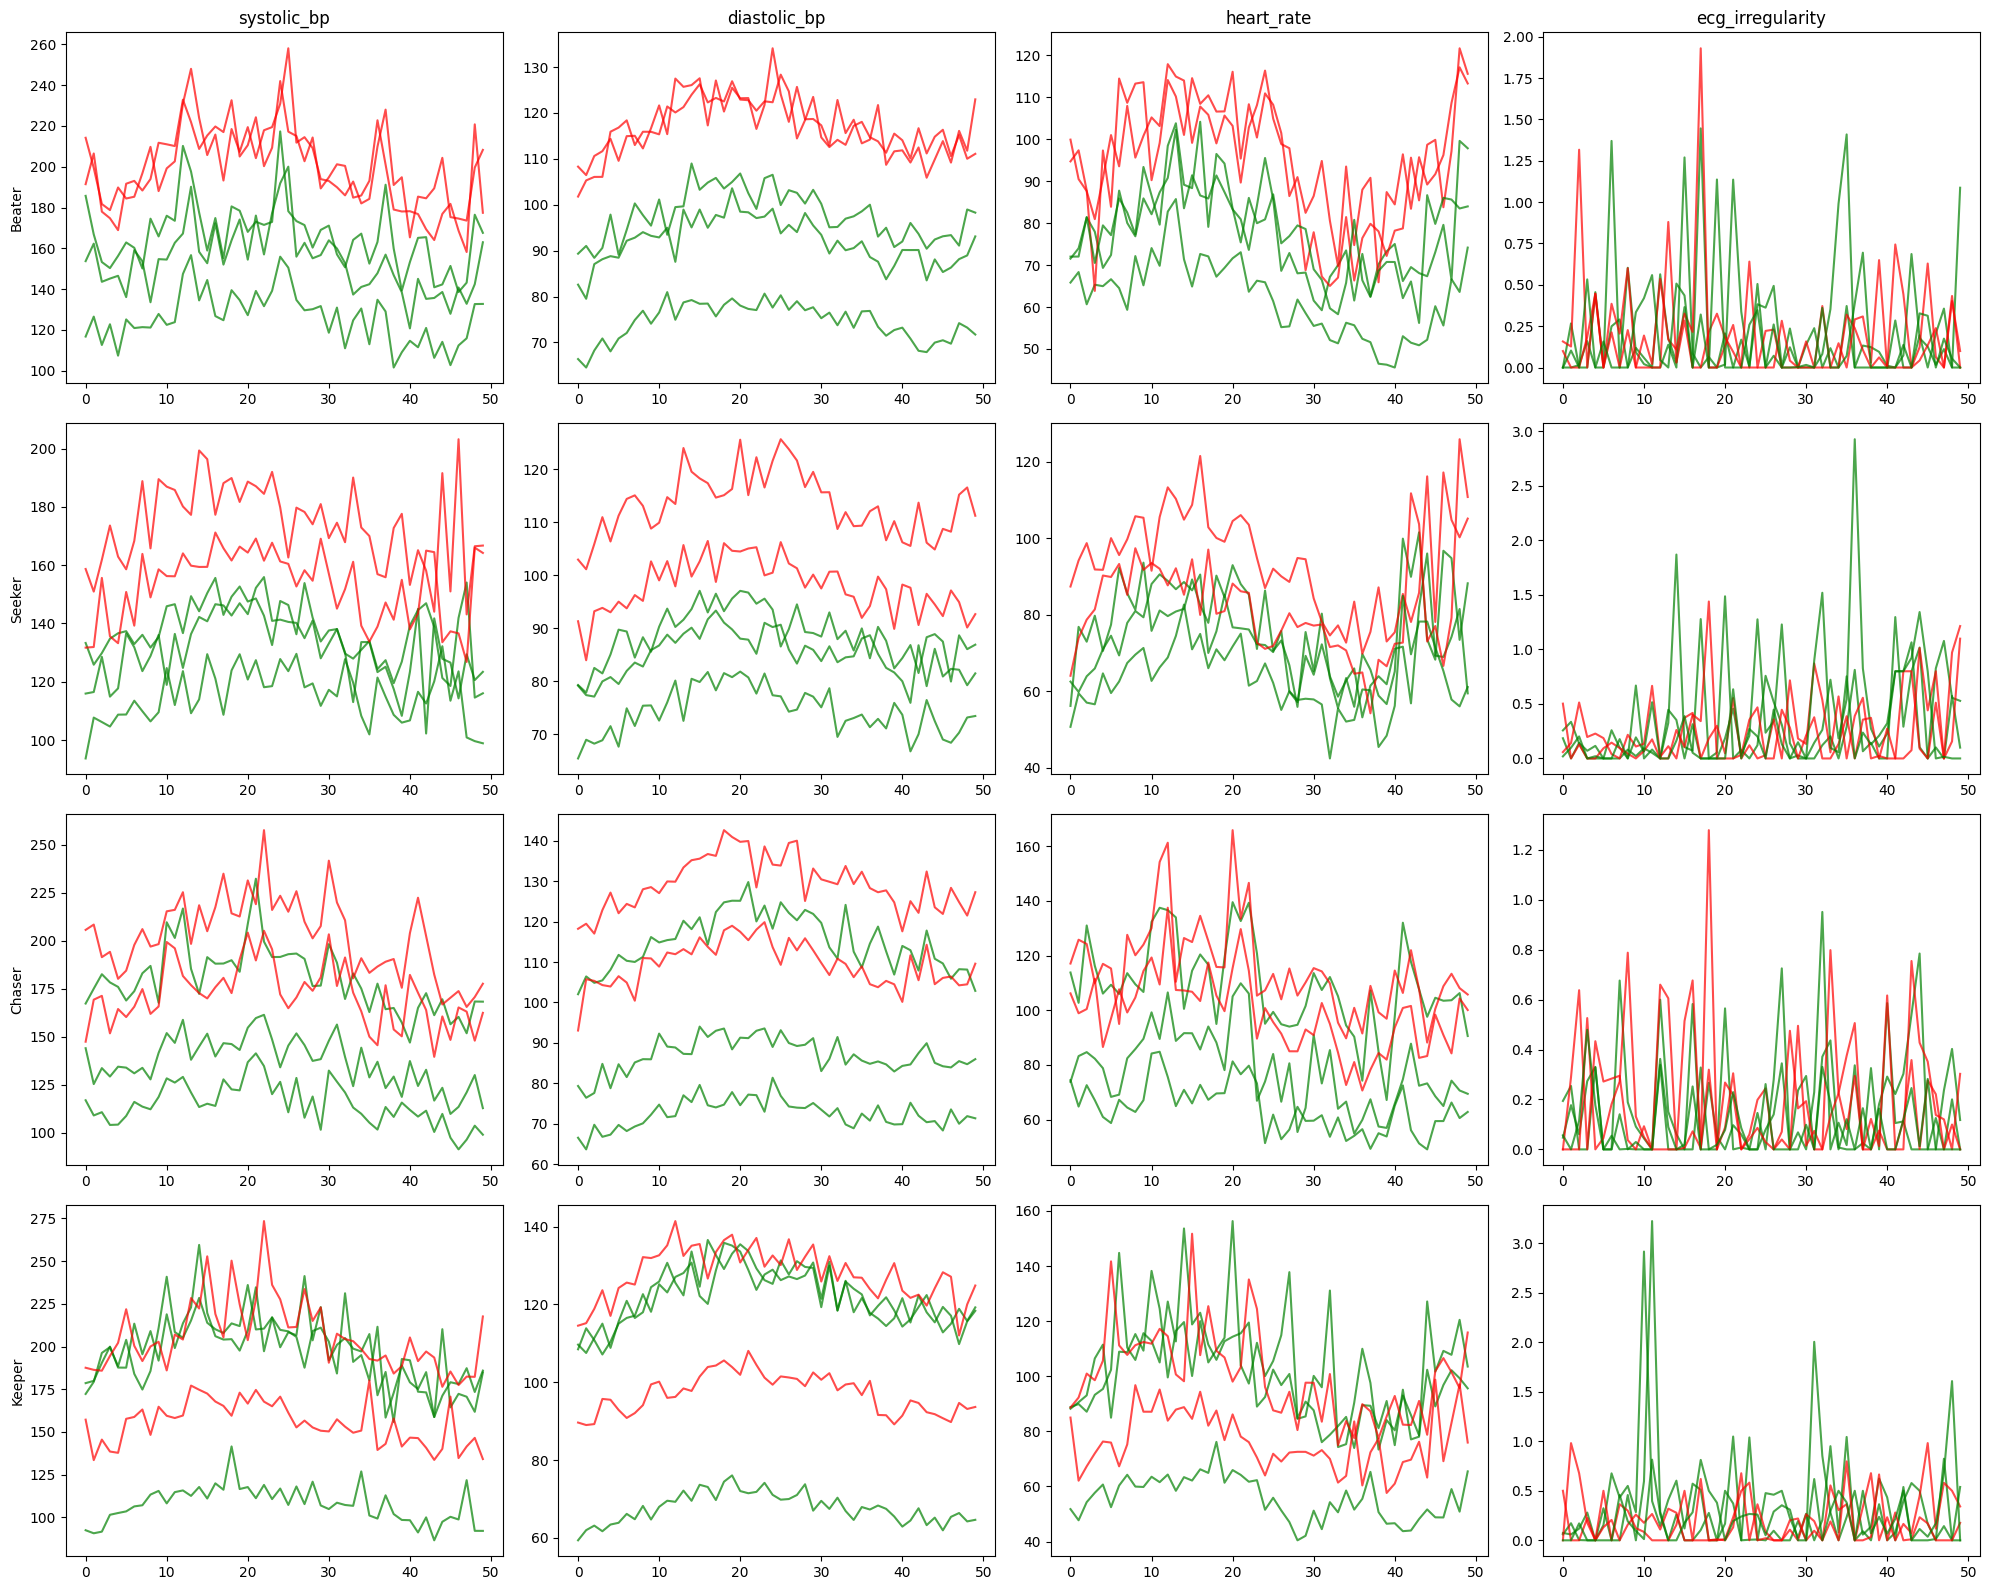


Sample ECG Patterns:


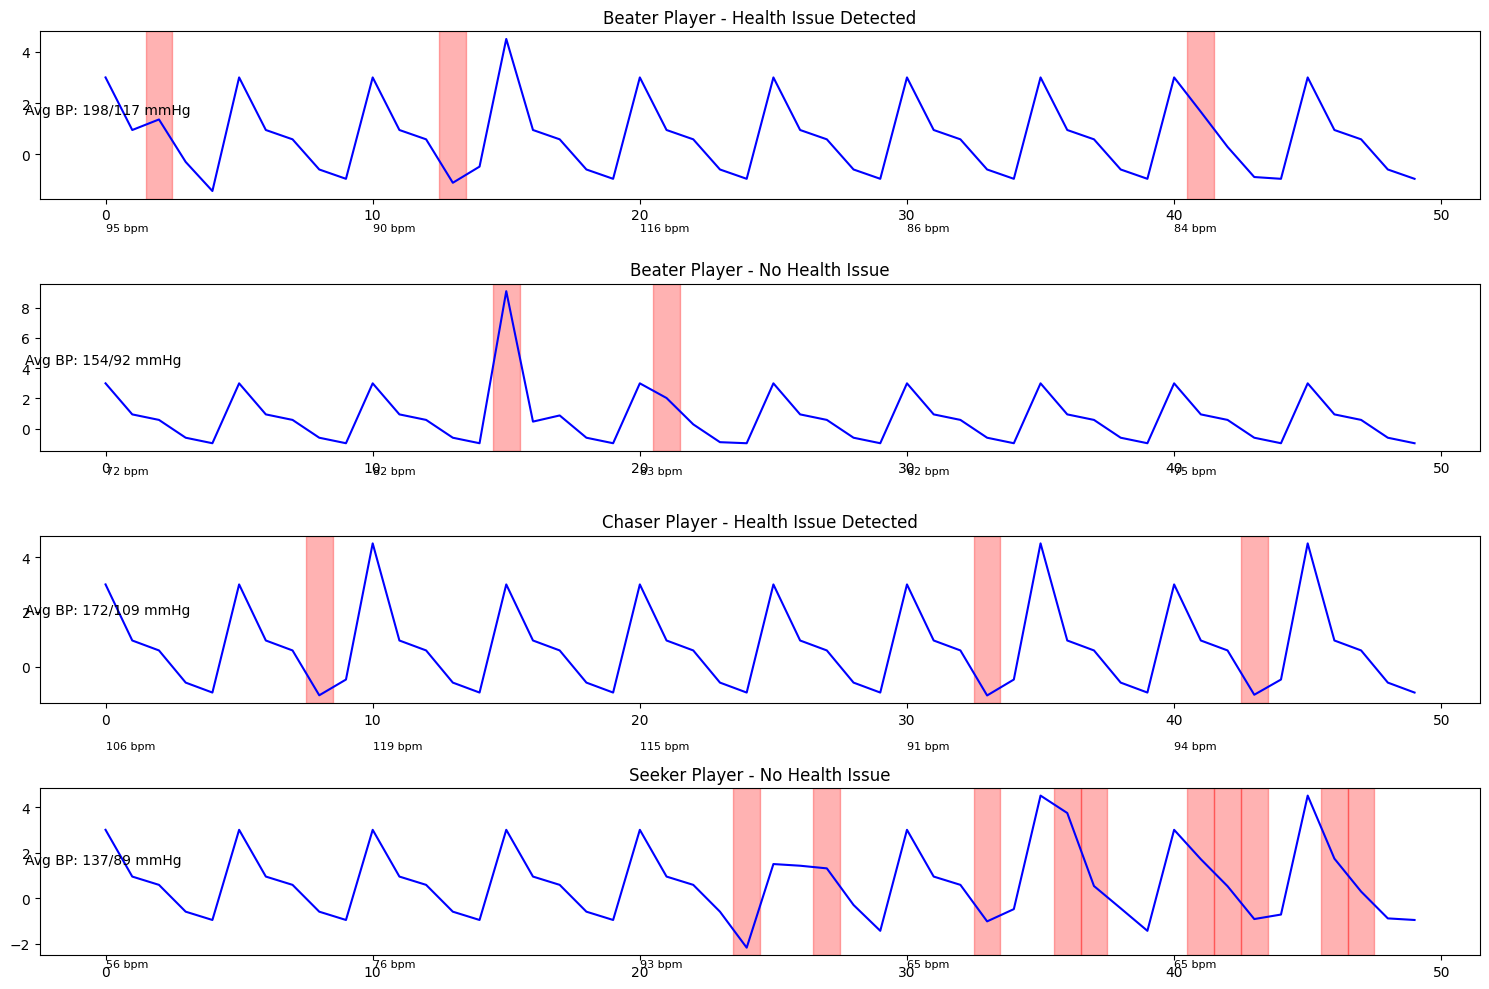


Health Risk Analysis by Position:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


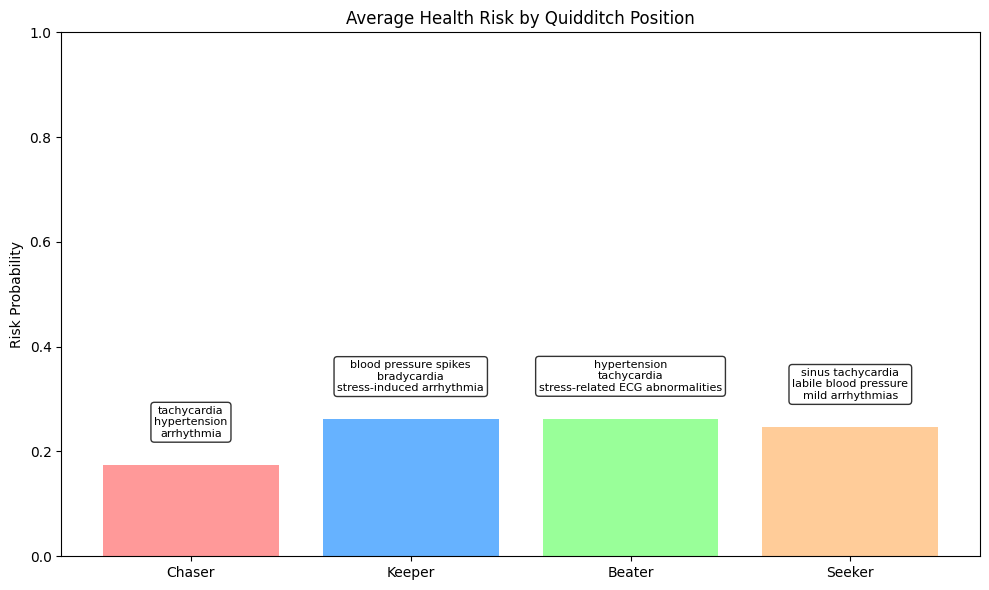

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Sample Prediction Analysis:
Position: Beater
Predicted health risk probability: 0.2124
Actual health issue: No
Prediction: Low risk

Potential health issues for Beater:
 - hypertension
 - tachycardia
 - stress-related ECG abnormalities

Vital Signs Summary:
Average BP: 137.2/81.3 mmHg
Average Heart Rate: 67.4 bpm
ECG Irregularity Index: 0.1635

Monitoring system executed successfully!

System ready for real-time monitoring!


In [3]:
# Set random seed for reproducibility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

class QuidditchVitalSignsMonitor:
    def __init__(self):
        # Define potential health risks for each position
        self.position_health_risks = {
            'Chaser': {
                'potential_risks': [
                    'tachycardia',
                    'hypertension',
                    'arrhythmia'
                ],
                'risk_factors': [
                    'sustained aerobic activity',
                    'rapid direction changes',
                    'stress response'
                ]
            },
            'Keeper': {
                'potential_risks': [
                    'blood pressure spikes',
                    'bradycardia',
                    'stress-induced arrhythmia'
                ],
                'risk_factors': [
                    'anticipatory stress',
                    'intermittent intense activity',
                    'vigilance-related stress'
                ]
            },
            'Beater': {
                'potential_risks': [
                    'hypertension',
                    'tachycardia',
                    'stress-related ECG abnormalities'
                ],
                'risk_factors': [
                    'upper body exertion',
                    'force generation',
                    'adrenaline spikes'
                ]
            },
            'Seeker': {
                'potential_risks': [
                    'sinus tachycardia',
                    'labile blood pressure',
                    'mild arrhythmias'
                ],
                'risk_factors': [
                    'prolonged vigilance',
                    'sudden bursts of activity',
                    'adrenaline response'
                ]
            }
        }

        # Initialize the model
        self.model = None
        self.feature_names = None

    def generate_vital_signs_data(self, num_players=100, matches_per_player=10, time_steps=50):
        """
        Generate synthetic time series data for player vital signs during matches
        """
        # All Quidditch positions
        positions = list(self.position_health_risks.keys())

        player_data = []
        vital_signs_series = []
        health_outcomes = []

        for player_id in range(num_players):
            # Assign player attributes
            position = np.random.choice(positions)
            age = np.random.normal(25, 5)
            years_playing = np.random.normal(5, 3)

            # Generate baseline risk factors based on position
            position_risk_factors = {}
            for risk_factor in self.position_health_risks[position]['risk_factors']:
                position_risk_factors[risk_factor] = np.random.uniform(2, 8)

            # Determine baseline health risk for this player
            baseline_risk_score = sum(position_risk_factors.values()) / len(position_risk_factors)

            # Generate match data for each player
            for match_id in range(matches_per_player):
                # Generate time series data for this match
                match_intensity = np.random.uniform(0.7, 1.3)  # Random match intensity multiplier

                # Initialize time series arrays for this match
                systolic_bp = []
                diastolic_bp = []
                heart_rate = []
                ecg_rhythm = []  # Simulated ECG rhythm irregularity (higher = more irregular)

                # Base values influenced by position and age
                base_systolic = 120 + 0.5 * age
                base_diastolic = 80 + 0.3 * age
                base_heart_rate = 70 + (30 / age)

                # Position-specific baseline adjustments
                if position == 'Chaser':
                    base_heart_rate *= 1.1  # Higher baseline for more active position
                elif position == 'Keeper':
                    base_systolic *= 1.05  # Slightly elevated BP from stress
                elif position == 'Beater':
                    base_systolic *= 1.08  # Higher BP from physical exertion
                elif position == 'Seeker':
                    base_heart_rate *= 1.05  # Slightly elevated from vigilance

                # Generate time series data
                for t in range(time_steps):
                    # Add match progression effects - more intense as match continues
                    time_factor = 1 + (0.2 * t / time_steps)

                    # Add randomness and trends for systolic BP
                    sys_bp_val = base_systolic * match_intensity * time_factor * (1 + 0.15 * np.sin(t/10) + np.random.normal(0, 0.05))

                    # Diastolic BP correlates with systolic but has less variation
                    dias_bp_val = base_diastolic * match_intensity * time_factor * (1 + 0.1 * np.sin(t/10) + np.random.normal(0, 0.03))

                    # Heart rate responds to match intensity and time
                    hr_val = base_heart_rate * match_intensity * time_factor * (1 + 0.2 * np.sin(t/8) + np.random.normal(0, 0.08))

                    # ECG rhythm irregularity (0 = normal, higher values = more irregular)
                    # Most of the time it should be low, occasionally spiking
                    ecg_irregular = np.random.exponential(0.5) if np.random.random() < 0.2 else np.random.normal(0, 0.3)
                    ecg_irregular = max(0, ecg_irregular)  # No negative irregularity

                    # Position-specific vital sign adjustments
                    if position == 'Chaser':
                        if t % 10 < 3:  # Burst of activity
                            hr_val *= 1.2
                            sys_bp_val *= 1.1
                    elif position == 'Keeper':
                        if np.random.random() < 0.1:  # Sudden defensive moves
                            hr_val *= 1.3
                            sys_bp_val *= 1.15
                            ecg_irregular += 0.5  # Stress-induced irregularity
                    elif position == 'Beater':
                        if t % 12 < 2:  # Swinging motion
                            sys_bp_val *= 1.15
                            hr_val *= 1.1
                    elif position == 'Seeker':
                        if t > time_steps * 0.8 and np.random.random() < 0.3:  # Snitch chase near end
                            hr_val *= 1.4
                            sys_bp_val *= 1.2
                            ecg_irregular += 0.8  # Excitement-induced irregularity

                    systolic_bp.append(sys_bp_val)
                    diastolic_bp.append(dias_bp_val)
                    heart_rate.append(hr_val)
                    ecg_rhythm.append(ecg_irregular)

                # Calculate match stress indicators
                avg_systolic = np.mean(systolic_bp)
                avg_diastolic = np.mean(diastolic_bp)
                avg_heart_rate = np.mean(heart_rate)
                max_heart_rate = np.max(heart_rate)
                ecg_irregularity = np.mean(ecg_rhythm)

                # Store time series data
                vital_series = np.column_stack([systolic_bp, diastolic_bp, heart_rate, ecg_rhythm])
                vital_signs_series.append({
                    'player_id': player_id,
                    'match_id': match_id,
                    'position': position,
                    'time_series': vital_series
                })

                # Store player data
                player_data.append({
                    'player_id': player_id,
                    'match_id': match_id,
                    'position': position,
                    'age': age,
                    'years_playing': years_playing,
                    'avg_systolic': avg_systolic,
                    'avg_diastolic': avg_diastolic,
                    'avg_heart_rate': avg_heart_rate,
                    'max_heart_rate': max_heart_rate,
                    'ecg_irregularity': ecg_irregularity,
                    'match_intensity': match_intensity
                })

                # Calculate health risk for this match
                health_risk = baseline_risk_score
                # Adjust risk based on vital signs
                health_risk += 0.1 * (avg_systolic - 120) / 20  # Higher systolic BP increases risk
                health_risk += 0.1 * (avg_heart_rate - 70) / 30  # Higher heart rate increases risk
                health_risk += 0.3 * ecg_irregularity  # ECG irregularities strongly increase risk
                health_risk += 0.05 * match_intensity  # More intense matches increase risk

                # Add some randomness
                health_risk += np.random.normal(0, 0.2)

                # Determine health outcome (simplified binary classification)
                # Note: Higher threshold than original code to make health issues less common
                health_issue = 1 if health_risk > 6 else 0

                health_outcomes.append({
                    'player_id': player_id,
                    'match_id': match_id,
                    'position': position,
                    'health_issue': health_issue,
                    'risk_score': health_risk
                })

        # Convert to dataframes
        player_df = pd.DataFrame(player_data)
        health_df = pd.DataFrame(health_outcomes)

        return player_df, vital_signs_series, health_df

    def prepare_lstm_data(self, player_df, vital_signs_series, health_df):
        """
        Prepare data for LSTM model - combines player attributes with time series vital signs data
        """
        # Create feature arrays for LSTM
        X_seq = []
        player_positions = []
        y = []
        player_ids = []

        for match in vital_signs_series:
            player_id = match['player_id']
            match_id = match['match_id']
            position = match['position']

            # Get corresponding health outcome
            health_row = health_df[(health_df['player_id'] == player_id) &
                                  (health_df['match_id'] == match_id)]

            if not health_row.empty:
                X_seq.append(match['time_series'])
                y.append(health_row['health_issue'].values[0])
                player_positions.append(position)
                player_ids.append(player_id)

        # Convert to numpy arrays
        X_seq = np.array(X_seq)
        y = np.array(y)

        # Store feature names for later reference
        self.feature_names = ['systolic_bp', 'diastolic_bp', 'heart_rate', 'ecg_irregularity']

        # Split the data
        X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test = train_test_split(
            X_seq, y, player_positions, player_ids, test_size=0.2, random_state=42)

        return X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test

    def build_lstm_model(self, input_shape):
        """
        Build an LSTM model for vital signs sequence data
        """
        model = Sequential([
            # LSTM layers
            LSTM(64, input_shape=input_shape, return_sequences=True),
            BatchNormalization(),
            Dropout(0.3),

            LSTM(32, return_sequences=False),
            BatchNormalization(),
            Dropout(0.3),

            # Dense layers for classification
            Dense(16, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),

            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        return model

    def train_lstm_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """
        Train the LSTM model with early stopping
        """
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        # Get input shape from training data
        input_shape = X_train.shape[1:]

        # Build the model
        self.model = self.build_lstm_model(input_shape)

        # Train the model
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        return history

    def evaluate_lstm_model(self, X_test, y_test):
        """
        Evaluate the LSTM model
        """
        # Predict probabilities
        y_pred_prob = self.model.predict(X_test)
        # Convert to binary predictions
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred)

        # Calculate accuracy
        accuracy = (y_pred == y_test).mean()

        return {
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': report,
            'predictions': y_pred,
            'probabilities': y_pred_prob
        }

    def predict_health_risk_from_vitals(self, vital_signs_data):
        """
        Predict health risk from a single match time series of vital signs
        """
        # Ensure data is in the right shape
        if len(vital_signs_data.shape) == 2:  # Single sequence
            vital_signs_data = np.expand_dims(vital_signs_data, axis=0)

        # Make prediction
        risk_probability = self.model.predict(vital_signs_data)
        return risk_probability[0][0]

    def visualize_training_history(self, history):
        """
        Visualize the training history
        """
        plt.figure(figsize=(12, 4))

        # Plot training & validation accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='lower right')

        # Plot training & validation loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')

        plt.tight_layout()
        plt.show()

    def visualize_confusion_matrix(self, cm):
        """
        Visualize confusion matrix
        """
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['No Health Issue', 'Health Issue'],
                   yticklabels=['No Health Issue', 'Health Issue'])
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

    def visualize_feature_importance(self, X_test, feature_names=None):
        """
        Visualize feature importance using permutation importance
        """
        if feature_names is None:
            feature_names = self.feature_names

        # Get baseline accuracy
        original_preds = self.model.predict(X_test)

        # Dictionary to store feature importance
        feature_importance = {}

        # For each feature, permute its values and see how it affects predictions
        for i, feature in enumerate(feature_names):
            # Make a copy of the test data
            X_permuted = X_test.copy()

            # Permute this feature across all time steps
            for j in range(X_permuted.shape[0]):
                np.random.shuffle(X_permuted[j, :, i])

            # Get new predictions
            new_preds = self.model.predict(X_permuted)

            # Calculate drop in accuracy (importance)
            importance = np.mean(np.abs(original_preds - new_preds))
            feature_importance[feature] = importance

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        features = list(feature_importance.keys())
        importances = list(feature_importance.values())
        indices = np.argsort(importances)

        plt.barh(range(len(indices)), [importances[i] for i in indices])
        plt.yticks(range(len(indices)), [features[i] for i in indices])
        plt.title('Feature Importance')
        plt.xlabel('Mean Absolute Difference in Predictions')
        plt.tight_layout()
        plt.show()

        return feature_importance

    def visualize_vital_signs(self, X, positions, health_outcomes, sample_size=5):
        """
        Visualize sample vital signs data for each position
        """
        # Number of features
        n_features = X.shape[2]
        feature_names = self.feature_names if self.feature_names else [f'Feature {i}' for i in range(n_features)]

        # Unique positions
        unique_positions = list(set(positions))

        # Plot settings
        n_positions = len(unique_positions)
        fig, axes = plt.subplots(n_positions, n_features, figsize=(20, 4*n_positions))

        # For each position
        for p, position in enumerate(unique_positions):
            # Find samples for this position
            position_indices = [i for i, pos in enumerate(positions) if pos == position]

            # Select samples (both healthy and with issues if possible)
            healthy_indices = [i for i in position_indices if health_outcomes[i] == 0]
            issue_indices = [i for i in position_indices if health_outcomes[i] == 1]

            # Take up to sample_size/2 from each category
            healthy_sample = healthy_indices[:sample_size//2] if healthy_indices else []
            issue_sample = issue_indices[:sample_size//2] if issue_indices else []
            selected_indices = healthy_sample + issue_sample

            # If not enough samples, add more from either category
            remaining = sample_size - len(selected_indices)
            if remaining > 0:
                if len(healthy_indices) > len(healthy_sample):
                    selected_indices += healthy_indices[len(healthy_sample):len(healthy_sample)+remaining]
                elif len(issue_indices) > len(issue_sample):
                    selected_indices += issue_indices[len(issue_sample):len(issue_sample)+remaining]

            # Plot each feature for this position
            for f in range(n_features):
                ax = axes[p, f] if n_positions > 1 else axes[f]

                # Plot data
                for idx in selected_indices:
                    color = 'red' if health_outcomes[idx] == 1 else 'green'
                    alpha = 0.7
                    ax.plot(X[idx, :, f], color=color, alpha=alpha)

                # Add title and labels
                if p == 0:
                    ax.set_title(feature_names[f])
                if f == 0:
                    ax.set_ylabel(position)

        plt.tight_layout()
        plt.show()

    def visualize_ecg_patterns(self, X_test, pos_test, y_test, num_samples=4):
        """
        Visualize ECG patterns for different players
        """
        plt.figure(figsize=(15, 10))

        # Generate an ECG-like visualization based on the irregularity values
        # This is a simplified representation, not a real ECG waveform
        for sample_idx in range(min(num_samples, len(X_test))):
            sample_vitals = X_test[sample_idx]
            position = pos_test[sample_idx]
            health_issue = y_test[sample_idx]

            # Get heart rate data
            heart_rate = sample_vitals[:, 2]
            ecg_irregularity = sample_vitals[:, 3]

            # Create subplot
            plt.subplot(num_samples, 1, sample_idx+1)

            # Generate a simple ECG-like pattern
            time = np.arange(len(heart_rate))
            # Base ECG-like pattern (simplified)
            base_pattern = np.sin(2 * np.pi * time / 5)

            # Add QRS complex simulation
            qrs_peaks = np.zeros_like(time)
            for i in range(len(time)):
                if i % 5 == 0:  # Every 5 time steps, simulate a heartbeat
                    # Higher irregularity = more variable QRS complex
                    qrs_amplitude = 3 * (1 + 0.5 * ecg_irregularity[i])
                    qrs_peaks[i] = qrs_amplitude

            # Combine into a simplified ECG
            ecg_pattern = base_pattern + qrs_peaks

            # Add irregularities where indicated
            for i in range(len(time)):
                if ecg_irregularity[i] > 0.7:  # Significant irregularity
                    # Add arrhythmia-like pattern
                    if i < len(time) - 3:
                        ecg_pattern[i] *= (1 + ecg_irregularity[i])
                        ecg_pattern[i+1] *= 0.5
                        ecg_pattern[i+2] *= 1.5

            # Plot the simplified ECG
            plt.plot(time, ecg_pattern, color='blue')

            # Add heart rate values at intervals
            for i in range(0, len(time), 10):
                plt.text(i, -3, f"{heart_rate[i]:.0f} bpm", fontsize=8)

            # Highlight areas with high irregularity
            for i in range(len(time)):
                if ecg_irregularity[i] > 0.7:
                    plt.axvspan(i-0.5, i+0.5, color='red', alpha=0.3)

            # Add title with position and health status
            health_status = "Health Issue Detected" if health_issue == 1 else "No Health Issue"
            plt.title(f"{position} Player - {health_status}")

            # Add BP information
            avg_sys = np.mean(sample_vitals[:, 0])
            avg_dia = np.mean(sample_vitals[:, 1])
            plt.figtext(0.02, 0.88 - 0.25*sample_idx, f"Avg BP: {avg_sys:.0f}/{avg_dia:.0f} mmHg", fontsize=10)

        plt.tight_layout()
        plt.show()

# Main execution function
def run_quidditch_vitals_monitor():
    print("🧙‍♂️ Quidditch Player Vital Signs Monitor 🧹")
    print("-" * 50)

    # Create the monitor
    monitor = QuidditchVitalSignsMonitor()

    # Generate synthetic vital signs data
    print("Generating synthetic Quidditch vital signs data...")
    player_df, vital_signs_series, health_df = monitor.generate_vital_signs_data(
        num_players=100, matches_per_player=10, time_steps=50)

    # Display summary of the generated data
    print(f"Generated data for {len(player_df)} player-matches")
    position_counts = player_df['position'].value_counts()
    print("\nPosition distribution:")
    for position, count in position_counts.items():
        print(f"  {position}: {count} matches")

    health_issue_rate = health_df['health_issue'].mean() * 100
    print(f"\nHealth issue rate: {health_issue_rate:.1f}%")

    # Prepare data for LSTM
    print("\nPreparing data for LSTM model...")
    X_train, X_test, y_train, y_test, pos_train, pos_test, id_train, id_test = (
        monitor.prepare_lstm_data(player_df, vital_signs_series, health_df)
    )

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Train LSTM model
    print("\nTraining LSTM model...")
    history = monitor.train_lstm_model(X_train, y_train, X_test, y_test, epochs=30, batch_size=32)

    # Visualize training history
    print("\nTraining history:")
    monitor.visualize_training_history(history)

    # Evaluate the model
    print("\nEvaluating model...")
    results = monitor.evaluate_lstm_model(X_test, y_test)
    print(f"Test accuracy: {results['accuracy']:.4f}")
    print("\nClassification Report:")
    print(results['classification_report'])

    # Visualize confusion matrix
    print("\nConfusion Matrix:")
    monitor.visualize_confusion_matrix(results['confusion_matrix'])

    # Visualize feature importance
    print("\nFeature Importance Analysis:")
    monitor.visualize_feature_importance(X_test)

    # Visualize sample vital signs for each position
    print("\nSample Vital Signs Data by Position:")
    monitor.visualize_vital_signs(X_test, pos_test, y_test)

    # Visualize ECG patterns
    print("\nSample ECG Patterns:")
    monitor.visualize_ecg_patterns(X_test, pos_test, y_test)

    # Analyze health risk by position
    print("\nHealth Risk Analysis by Position:")
    position_risk = {}
    for position in monitor.position_health_risks.keys():
        # Filter test set by position
        position_indices = [i for i, pos in enumerate(pos_test) if pos == position]
        if position_indices:
            position_X = X_test[position_indices]
            position_y = y_test[position_indices]

            # Get predictions
            y_pred_prob = monitor.model.predict(position_X).flatten()
            avg_risk = np.mean(y_pred_prob)
            position_risk[position] = avg_risk

    # Plot position risk
    plt.figure(figsize=(10, 6))
    positions = list(position_risk.keys())
    risks = [position_risk[p] for p in positions]
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

    plt.bar(positions, risks, color=colors)
    plt.title('Average Health Risk by Quidditch Position')
    plt.ylabel('Risk Probability')
    plt.ylim(0, 1)

    # Add position-specific health issues
    for i, position in enumerate(positions):
        risks = monitor.position_health_risks[position]['potential_risks']
        risk_text = "\n".join(risks)
        plt.annotate(risk_text,
                     xy=(i, position_risk[position] + 0.05),
                     ha='center',
                     va='bottom',
                     fontsize=8,
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Example prediction using a random test sample
    sample_idx = np.random.choice(len(X_test))
    sample_vitals = X_test[sample_idx]
    sample_position = pos_test[sample_idx]
    actual_outcome = y_test[sample_idx]

    risk_prob = monitor.predict_health_risk_from_vitals(sample_vitals)

    print(f"\nSample Prediction Analysis:")
    print(f"Position: {sample_position}")
    print(f"Predicted health risk probability: {risk_prob:.4f}")
    print(f"Actual health issue: {'Yes' if actual_outcome == 1 else 'No'}")
    print(f"Prediction: {'High risk' if risk_prob > 0.5 else 'Low risk'}")

    # Show potential health issues for this position
    print(f"\nPotential health issues for {sample_position}:")
    for risk in monitor.position_health_risks[sample_position]['potential_risks']:
        print(f" - {risk}")

    # Calculate average vital signs for this player
    avg_systolic = np.mean(sample_vitals[:, 0])
    avg_diastolic = np.mean(sample_vitals[:, 1])
    avg_heart_rate = np.mean(sample_vitals[:, 2])
    avg_ecg_irregularity = np.mean(sample_vitals[:, 3])

    print(f"\nVital Signs Summary:")
    print(f"Average BP: {avg_systolic:.1f}/{avg_diastolic:.1f} mmHg")
    print(f"Average Heart Rate: {avg_heart_rate:.1f} bpm")
    print(f"ECG Irregularity Index: {avg_ecg_irregularity:.4f}")

    return monitor

def run():
    """Main execution method for the Quidditch Vital Signs Monitor"""
    try:
        print("Starting Quidditch Vital Signs Monitoring System...")
        monitor = run_quidditch_vitals_monitor()
        print("\nMonitoring system executed successfully!")
        return monitor
    except Exception as e:
        print(f"\nError occurred during execution: {str(e)}")
        return None

if __name__ == "__main__":
    # Execute the monitoring system
    quidditch_monitor = run()

    # You can add additional code here to use the trained monitor instance
    # For example:
    if quidditch_monitor:
        print("\nSystem ready for real-time monitoring!")

# Third Try

🧙‍♂️ Quidditch Player Vital Signs Monitor 🧹
--------------------------------------------------
Generating synthetic Quidditch player data...

Generated data for 100 player-matches
Position distribution:
position
Beater    40
Keeper    40
Chaser    15
Seeker     5
Name: count, dtype: int64

Health issue rate: 12.0%

Training data shape: (80, 3000, 5)
Test data shape: (20, 3000, 5)


C:\Users\gamer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.5945 - loss: 0.7771 - val_accuracy: 0.1000 - val_loss: 0.7764
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.6531 - loss: 0.7673 - val_accuracy: 0.0000e+00 - val_loss: 0.7531
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6484 - loss: 0.6666 - val_accuracy: 0.0500 - val_loss: 0.7317
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.6484 - loss: 0.6721 - val_accuracy: 0.2500 - val_loss: 0.7140
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.6984 - loss: 0.6916 - val_accuracy: 0.7500 - val_loss: 0.6925
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.7539 - loss: 0.5254 - val_accuracy: 0.8500 - val_loss: 0.6695
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.7203 - loss: 0.5084 - val_accuracy: 0.8500 - val_loss: 0.6516
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 6s/step - accuracy: 0.7172 - loss: 0.5448 - val_accuracy: 0.8500 - val_loss: 0.6388
Epoc

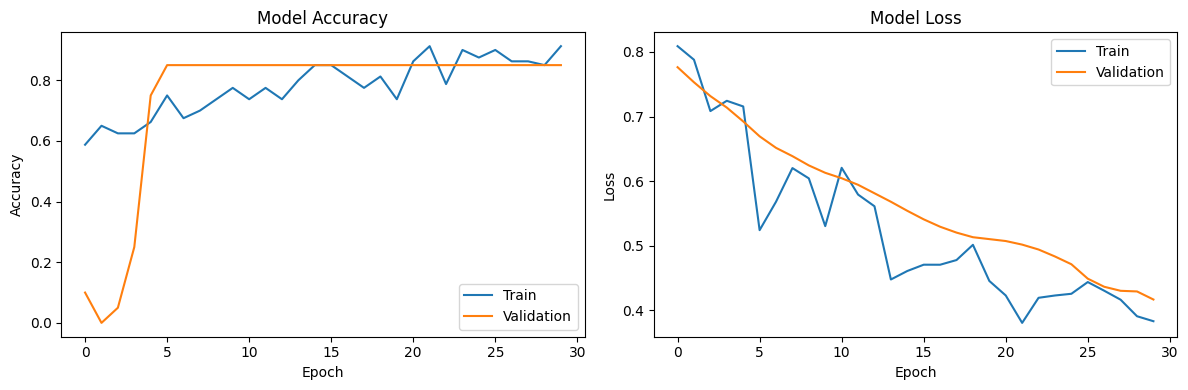

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


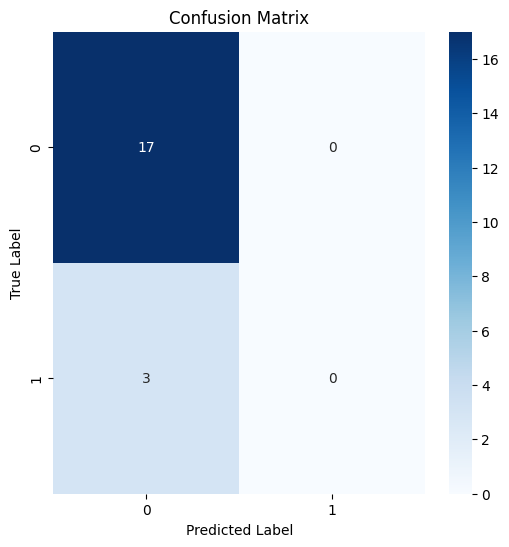

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


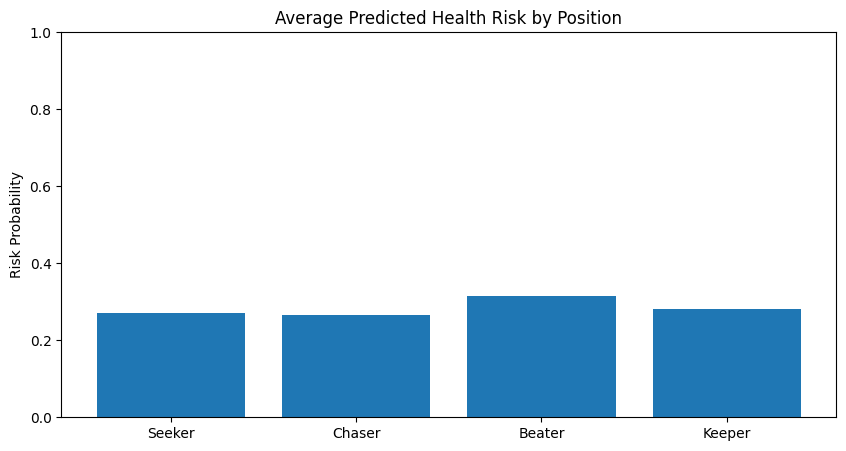

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step

Sample Player Analysis (Beater):
Predicted risk: 0.2607 (Low risk)
Actual health status: No issue


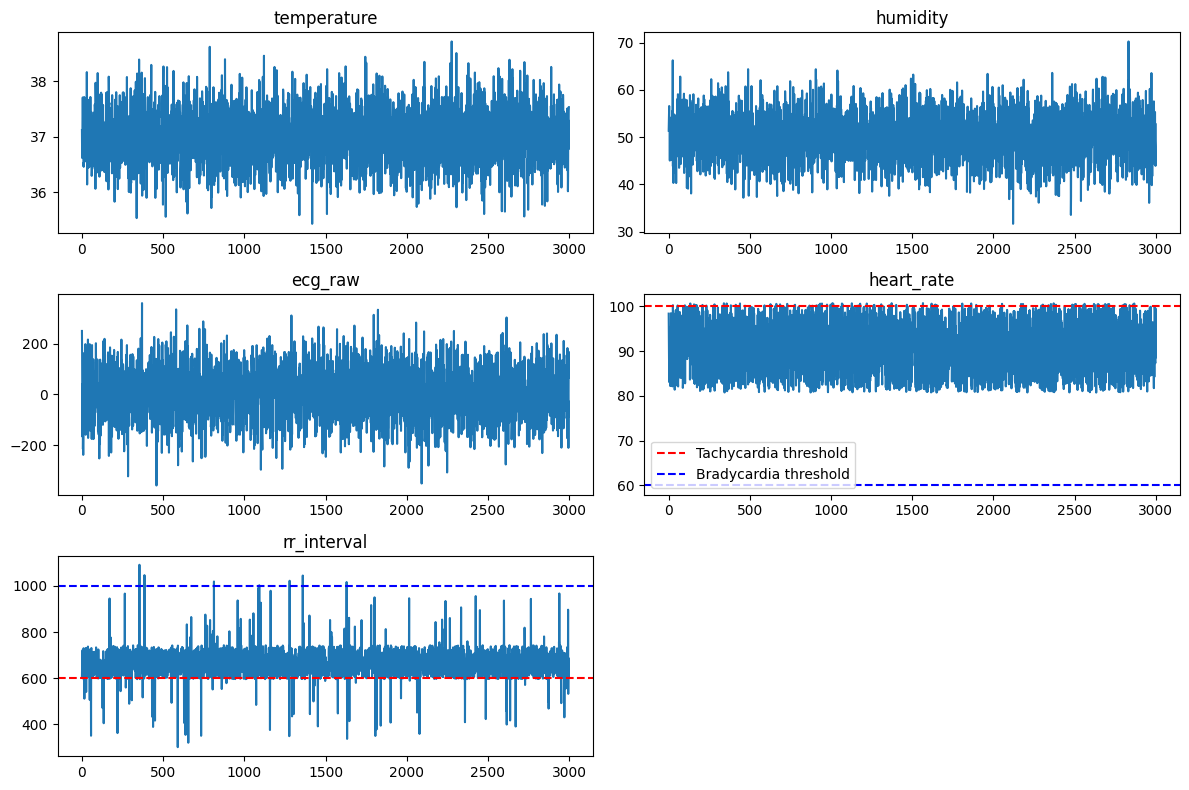


Model saved as 'quidditch_health_model.h5'


In [ ]:
# Set random seed for reproducibility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

def generate_synthetic_data():
    """Generate synthetic Quidditch player vital signs data"""
    print("Generating synthetic Quidditch player data...")

    # Configuration
    POSITIONS = ['Chaser', 'Keeper', 'Beater', 'Seeker']
    SAMPLE_RATE = 10  # samples per second
    DURATION = 60 * 5  # 5 minutes of data per match
    NUM_PLAYERS = 20
    NUM_MATCHES = 5

    player_data = []
    vital_signs_series = []
    health_outcomes = []

    for player_id in range(NUM_PLAYERS):
        position = np.random.choice(POSITIONS)
        base_health = np.random.uniform(0.7, 1.0)  # Overall health factor

        for match_id in range(NUM_MATCHES):
            # Generate time series data
            time_points = np.arange(0, DURATION, 1/SAMPLE_RATE)
            n_samples = len(time_points)

            # Generate vital signs with position-specific patterns
            if position == 'Chaser':
                base_hr = np.random.normal(90, 5)
                hr_series = base_hr + 30 * np.sin(2 * np.pi * time_points/60)
                hr_series += np.random.normal(0, 5, n_samples)
                rr_series = 60000/hr_series

            elif position == 'Keeper':
                base_hr = np.random.normal(80, 5)
                hr_series = base_hr * np.ones(n_samples)
                for i in range(int(DURATION/30)):
                    start = i*30*SAMPLE_RATE
                    end = start + 5*SAMPLE_RATE
                    hr_series[start:end] += np.random.uniform(20, 40)
                rr_series = 60000/hr_series

            elif position == 'Beater':
                base_hr = np.random.normal(85, 5)
                hr_series = base_hr + 20 * np.random.rand(n_samples)
                rr_series = 60000/hr_series
                arrhythmia_points = np.random.choice(n_samples, size=int(n_samples*0.05), replace=False)
                rr_series[arrhythmia_points] *= np.random.uniform(0.5, 1.5, len(arrhythmia_points))

            else:  # Seeker
                base_hr = np.random.normal(75, 5)
                hr_series = base_hr * np.ones(n_samples)
                burst_start = int((DURATION-30)*SAMPLE_RATE)
                hr_series[burst_start:] += np.random.uniform(30, 50)
                rr_series = 60000/hr_series

            # Add health issue effects
            health_issue = np.random.rand() > base_health

            if health_issue:
                if position == 'Chaser':
                    hr_series += np.random.uniform(10, 20)
                    rr_series = 60000/hr_series
                    arrhythmia_points = np.random.choice(n_samples, size=int(n_samples*0.1), replace=False)
                    rr_series[arrhythmia_points] *= np.random.uniform(0.3, 1.7, len(arrhythmia_points))

                elif position == 'Keeper':
                    bp_spikes = np.random.choice(n_samples, size=int(n_samples*0.05), replace=False)
                    hr_series[bp_spikes] += np.random.uniform(30, 50, len(bp_spikes))
                    rr_series = 60000/hr_series

                elif position == 'Beater':
                    hr_series += np.random.uniform(15, 25)
                    rr_series = 60000/hr_series

                else:  # Seeker
                    hr_series += np.random.uniform(5, 15)
                    rr_series = 60000/hr_series

            # Generate other vital signs
            temp_series = np.random.normal(37, 0.5, n_samples)
            if health_issue and np.random.rand() > 0.7:
                temp_series += np.random.uniform(1, 2)

            humidity_series = np.random.normal(50, 5, n_samples)
            ecg_series = np.random.normal(0, 100, n_samples)

            if health_issue:
                ecg_series += np.random.normal(0, 50, n_samples)
                abnormal_points = np.random.choice(n_samples, size=int(n_samples*0.1), replace=False)
                ecg_series[abnormal_points] *= np.random.uniform(2, 5, len(abnormal_points))

            # Combine all features
            vital_series = np.column_stack([
                temp_series,
                humidity_series,
                ecg_series,
                hr_series,
                rr_series
            ])

            # Store data
            player_data.append({
                'player_id': player_id,
                'match_id': match_id,
                'position': position,
                'age': np.random.randint(18, 35),
                'years_playing': np.random.randint(1, 10),
                'avg_temp': np.mean(temp_series),
                'avg_hr': np.mean(hr_series),
                'max_hr': np.max(hr_series),
                'min_rr': np.min(rr_series),
                'ecg_irregularity': np.std(ecg_series)/100,
                'match_intensity': np.random.uniform(0.5, 1.0)
            })

            vital_signs_series.append({
                'player_id': player_id,
                'match_id': match_id,
                'position': position,
                'time_series': vital_series
            })

            health_outcomes.append({
                'player_id': player_id,
                'match_id': match_id,
                'position': position,
                'health_issue': int(health_issue),
                'risk_score': np.random.uniform(0, 1) if health_issue else np.random.uniform(0, 0.3)
            })

    return pd.DataFrame(player_data), vital_signs_series, pd.DataFrame(health_outcomes)

def prepare_data(vital_signs_series, health_df):
    """Prepare data for LSTM training"""
    X_seq = []
    y = []
    positions = []

    for match in vital_signs_series:
        health_row = health_df[(health_df['player_id'] == match['player_id']) &
                              (health_df['match_id'] == match['match_id'])]
        if not health_row.empty:
            X_seq.append(match['time_series'])
            y.append(health_row['health_issue'].values[0])
            positions.append(match['position'])

    return np.array(X_seq), np.array(y), positions

def build_model(input_shape):
    """Build LSTM model architecture"""
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def plot_training_history(history):
    """Plot training and validation metrics"""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def analyze_position_risk(model, X_test, pos_test):
    """Analyze health risk by player position"""
    position_risk = {}
    for position in set(pos_test):
        pos_indices = [i for i, pos in enumerate(pos_test) if pos == position]
        if pos_indices:
            pos_X = X_test[pos_indices]
            pos_pred = model.predict(pos_X).flatten()
            position_risk[position] = np.mean(pos_pred)

    plt.figure(figsize=(10, 5))
    plt.bar(position_risk.keys(), position_risk.values())
    plt.title('Average Predicted Health Risk by Position')
    plt.ylabel('Risk Probability')
    plt.ylim(0, 1)
    plt.show()

def visualize_sample_player(model, X_test, pos_test, y_test, feature_names):
    """Visualize a random player's vital signs with prediction"""
    sample_idx = np.random.choice(len(X_test))
    sample_data = X_test[sample_idx]
    sample_position = pos_test[sample_idx]
    true_label = y_test[sample_idx]
    prediction = model.predict(np.expand_dims(sample_data, axis=0))[0][0]

    print(f"\nSample Player Analysis ({sample_position}):")
    print(f"Predicted risk: {prediction:.4f} ({'High risk' if prediction > 0.5 else 'Low risk'})")
    print(f"Actual health status: {'Issue detected' if true_label == 1 else 'No issue'}")

    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(feature_names):
        plt.subplot(3, 2, i+1)
        plt.plot(sample_data[:, i])
        plt.title(feature)
        if feature == 'heart_rate':
            plt.axhline(y=100, color='r', linestyle='--', label='Tachycardia threshold')
            plt.axhline(y=60, color='b', linestyle='--', label='Bradycardia threshold')
            plt.legend()
        elif feature == 'rr_interval':
            plt.axhline(y=60000/100, color='r', linestyle='--')
            plt.axhline(y=60000/60, color='b', linestyle='--')
    plt.tight_layout()
    plt.show()

def main():
    """Main execution function"""
    print("🧙‍♂️ Quidditch Player Vital Signs Monitor 🧹")
    print("-" * 50)

    # Generate and prepare data
    player_df, vital_signs_series, health_df = generate_synthetic_data()
    X, y, positions = prepare_data(vital_signs_series, health_df)

    # Display data summary
    print(f"\nGenerated data for {len(player_df)} player-matches")
    print("Position distribution:")
    print(player_df['position'].value_counts())
    print(f"\nHealth issue rate: {health_df['health_issue'].mean()*100:.1f}%")

    # Split data
    X_train, X_test, y_train, y_test, pos_train, pos_test = train_test_split(
        X, y, positions, test_size=0.2, random_state=42)
    print(f"\nTraining data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Build and train model
    model = build_model(X_train.shape[1:])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=30,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate and visualize results
    plot_training_history(history)
    evaluate_model(model, X_test, y_test)
    analyze_position_risk(model, X_test, pos_test)
    visualize_sample_player(model, X_test, pos_test, y_test,
                          ['temperature', 'humidity', 'ecg_raw', 'heart_rate', 'rr_interval'])

    # Save model
    model.save('quidditch_health_model.h5')
    print("\nModel saved as 'quidditch_health_model.h5'")

if __name__ == "__main__":
    main()